### Task 25 Home Data set

#### Data Collection and Preparation

In [2]:
# Load data
import pandas as pd
import numpy as np

In [3]:
url = 'https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv'
df = pd.read_csv(url)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#  Inspect the dataset for missing values, duplicates, and data type inconsistencies.
df.info()
df.isnull().sum()
df.duplicated().sum()
df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
# Clean the dataset by handling missing values, correcting data types, and addressing outliers.
# Handling missing values
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Credit_History'] = df['Credit_History'].fillna(
    df['Credit_History'].mode()[0])

categorical_cols = [
    'Gender', 'Married', 'Dependents', 'Self_Employed',
    'Loan_Amount_Term', 'Loan_ID', 'Property_Area', 'Loan_Status'
]

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
# correcting data types
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)  
df['Credit_History'] = df['Credit_History'].astype(int)  
df['LoanAmount'] = df['LoanAmount'].astype(int)
df['Loan_Status'] = df['Loan_Status'].astype(str)
df['Gender'] = df['Gender'].astype(str)
df['Married'] = df['Married'].astype(str)
df['Self_Employed'] = df['Self_Employed'].astype(str)
df['Property_Area'] = df['Property_Area'].astype(str)
df['Education'] = df['Education'].astype(str)


In [30]:
# addressing outliers
df['ApplicantIncome'] = df['ApplicantIncome'].clip(lower=0)
df['CoapplicantIncome'] = df['CoapplicantIncome'].clip(lower=0)
df['LoanAmount'] = df['LoanAmount'].clip(lower=0)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].clip(lower=0)
df['Credit_History'] = df['Credit_History'].clip(lower=0)
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            47 non-null     object
 1   Gender             47 non-null     object
 2   Married            47 non-null     object
 3   Dependents         47 non-null     int64 
 4   Education          47 non-null     object
 5   Self_Employed      47 non-null     object
 6   ApplicantIncome    47 non-null     int64 
 7   CoapplicantIncome  47 non-null     int64 
 8   LoanAmount         47 non-null     int64 
 9   Loan_Amount_Term   47 non-null     int64 
 10  Credit_History     47 non-null     int64 
 11  Property_Area      47 non-null     object
 12  Loan_Status        47 non-null     object
dtypes: int64(6), object(7)
memory usage: 4.9+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001030,Male,Yes,2,Graduate,No,1299,1086,17,120,1,Urban,Y
1,LP001207,Male,Yes,0,Not Graduate,Yes,2609,3449,165,180,0,Rural,N
2,LP001228,Male,No,0,Not Graduate,No,3200,2254,126,180,0,Urban,N
3,LP001238,Male,Yes,3,Not Graduate,Yes,7100,0,125,60,1,Urban,Y
4,LP001275,Male,Yes,1,Graduate,No,3988,0,50,240,1,Urban,Y


#### Exploratory Data Analysis (EDA)

In [31]:
# Conduct descriptive statistics to summarize the key characteristics of the data
df.describe(include='all')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,47,47,47,47.000000,47,47,47.000000,47.000000,47.000000,47.000000,47.000000,47,47
unique,47,2,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001030,Male,Yes,NaN,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban,Y
freq,1,44,38,NaN,30,40,NaN,NaN,NaN,NaN,NaN,21,31
mean,NaN,NaN,NaN,1.042553,NaN,NaN,4674.297872,1624.063830,117.553191,161.361702,0.808511,NaN,NaN
std,NaN,NaN,NaN,1.062349,NaN,NaN,2751.141865,1993.431304,54.037752,46.530227,0.397727,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,1299.000000,0.000000,17.000000,36.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,2956.000000,0.000000,76.500000,180.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,1.000000,NaN,NaN,3593.000000,923.000000,120.000000,180.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,2.000000,NaN,NaN,6025.000000,2922.500000,155.000000,180.000000,1.000000,NaN,NaN


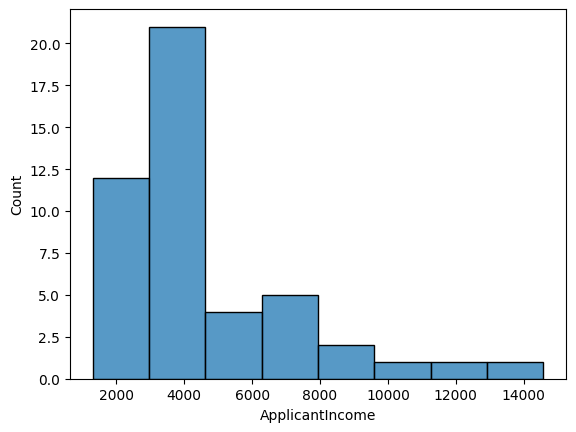

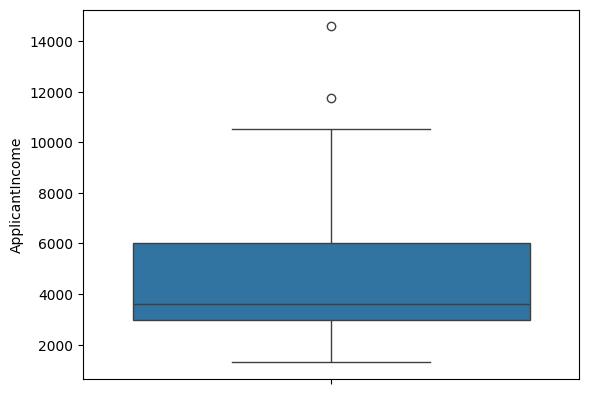

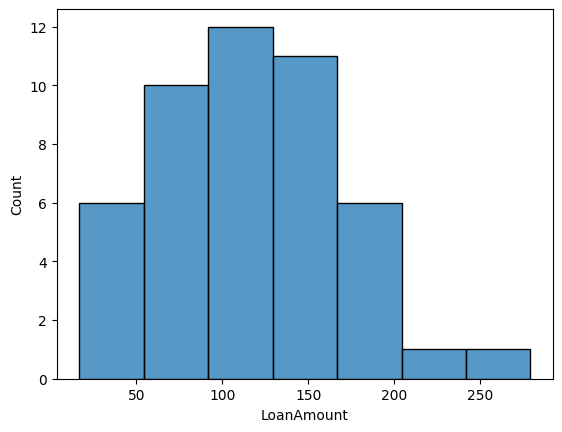

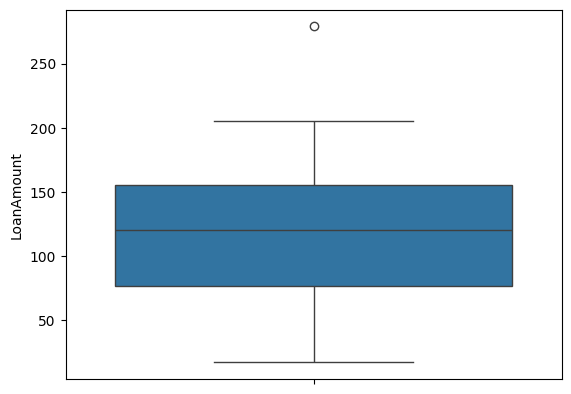

In [33]:
# Visualize distributions of numerical features (e.g., applicant income, loan amount) using histograms and box plots.
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['ApplicantIncome'])
plt.show() 
sns.boxplot(df['ApplicantIncome'])
plt.show()
sns.histplot(df['LoanAmount'])
plt.show()
sns.boxplot(df['LoanAmount'])
plt.show()

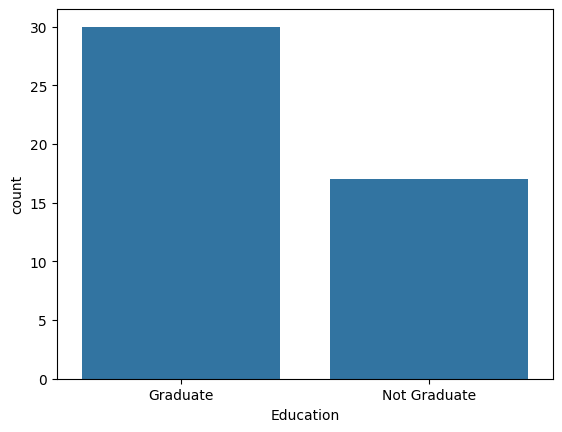

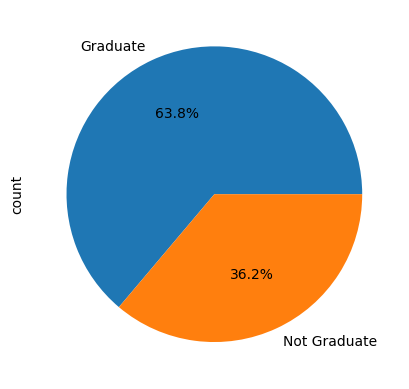

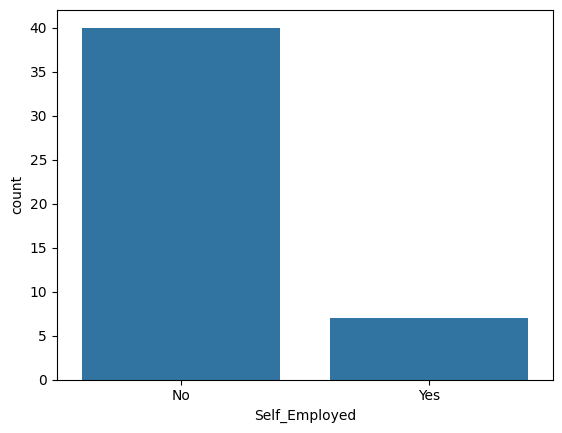

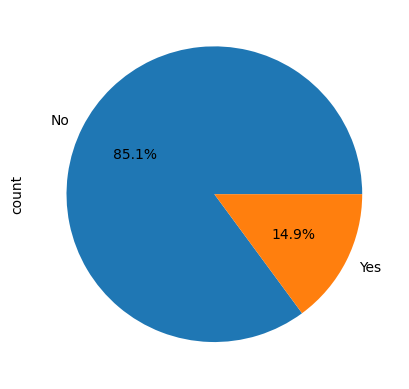

In [34]:
# Analyze categorical features (e.g., education, employment status, property area) using bar charts and pie charts.
sns.countplot(x='Education', data=df)
plt.show()
df['Education'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()
sns.countplot(x='Self_Employed', data=df)
plt.show()
df['Self_Employed'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()


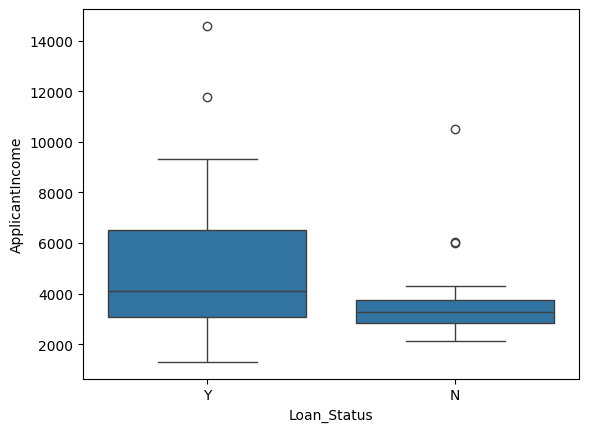

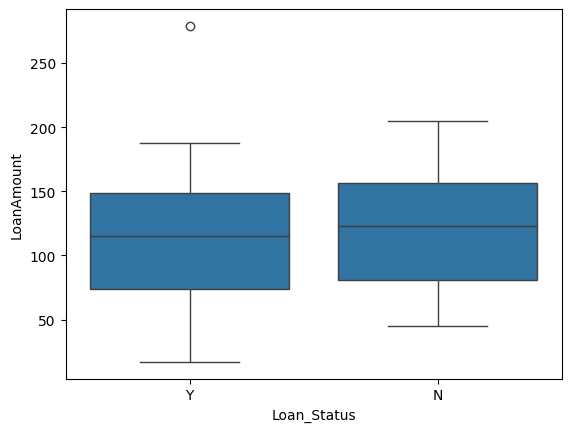

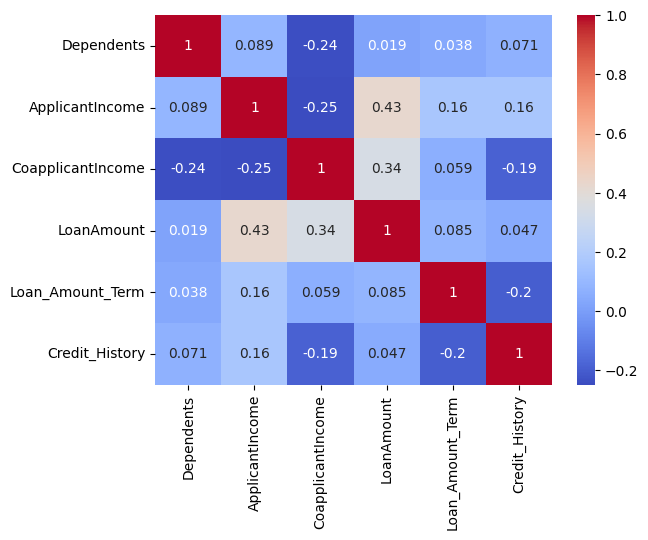

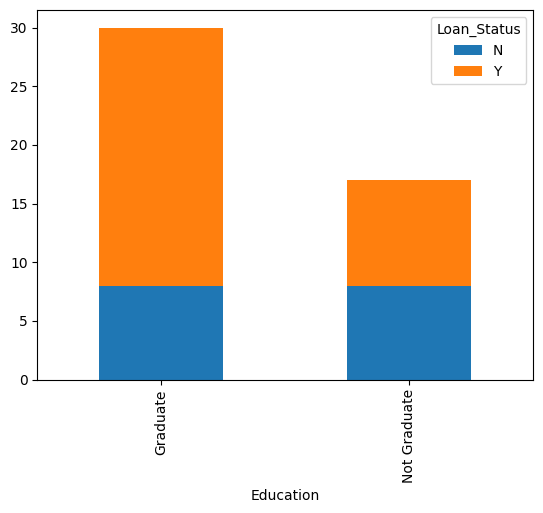

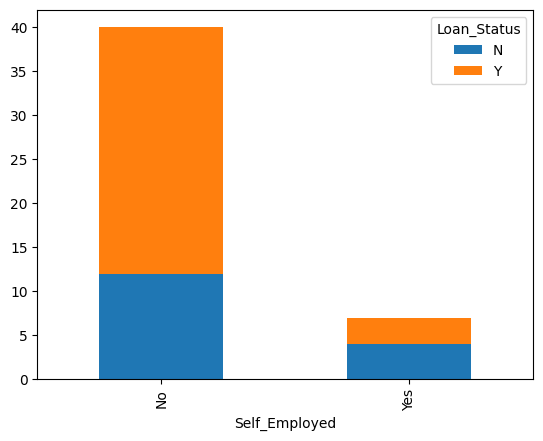

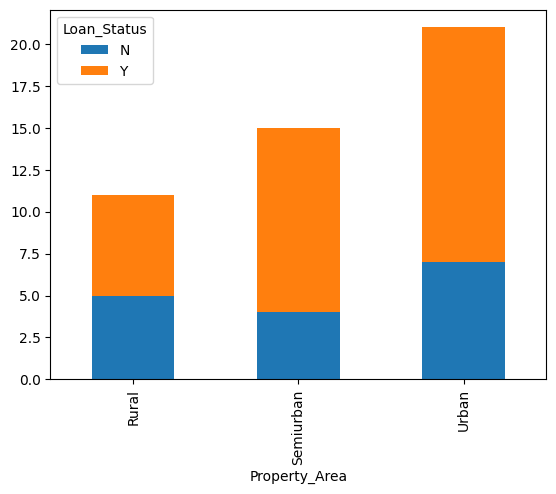

In [36]:
# Examine relationships between features and the target variable (loan approval status) using scatter plots, correlation matrices, and cross-tabulations.
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.show()
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.show()
# compute correlation only for numeric columns to avoid trying to convert non-numeric fields like Loan_ID
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
pd.crosstab(df['Education'], df['Loan_Status']).plot(kind='bar', stacked=True)
plt.show()
pd.crosstab(df['Self_Employed'], df['Loan_Status']).plot(kind='bar', stacked=True)
plt.show()
pd.crosstab(df['Property_Area'], df['Loan_Status']).plot(kind='bar', stacked=True)
plt.show()